imports

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# spd (Statistical Parity Difference)

analyse

In [18]:
def spd(model):
    df = pd.read_csv(f"data/prediction_with_{model}.csv")
    # for is_recid
    
    
    #for race
    df['protected_attr_race'] = df['race'].apply(lambda x: 0 if x == 'Caucasian' else 1)
    #rate of is_recid  for protected group
    protected_race_rate_is_recid = (df[df["protected_attr_race"] == 1]["is_recid"] == 0).mean()
    #rate of is_recid  for unprotected group
    unprotected_race_rate_is_recid  = (df[df["protected_attr_race"] == 0]["is_recid"] == 0).mean()
    #spd
    race_spd_is_recid  = protected_race_rate_is_recid  - unprotected_race_rate_is_recid 
    if race_spd_is_recid > 0:
        analyse_race_is_recid = "The model is biased against the protected group"
    elif race_spd_is_recid == 0:
        analyse_race_is_recid = "The model is not biased"
    else:
        analyse_race_is_recid = "The model is biased against the unprotected group"
    print(f"Spd for race : {race_spd_is_recid } for is_recid \n {analyse_race_is_recid}")
    
    
    #for sex
    df['protected_attr_sex'] = df['sex'].apply(lambda x: 0 if x == 'Male' else 1)
    #rate of is_recid  for protected group
    protected_sex_rate_is_recid  = (df[df["protected_attr_sex"] == 1]["is_recid"] == 0).mean()
    #rate of is_recid  for unprotected group
    unprotected_sex_rate_is_recid  = (df[df["protected_attr_sex"] == 0]["is_recid"] == 0).mean()
    #spd
    sex_spd_is_recid  = protected_sex_rate_is_recid  - unprotected_sex_rate_is_recid 
    if sex_spd_is_recid > 0:
        analyse_sex_is_recid = "The model is biased against the protected group"
    elif sex_spd_is_recid == 0:
        analyse_sex_is_recid = "The model is not biased"
    else:
        analyse_sex_is_recid = "The model is biased against the unprotected group"
    print(f"Spd for sex : {sex_spd_is_recid } for is_recid \n {analyse_sex_is_recid}")
    
    
    
    #for prediction
    
    
    #for race
    
    
    #rate of prediction  for protected group
    protected_race_rate_prediction = (df[df["protected_attr_race"] == 1]["prediction"]== 0).mean()
    #rate of prediction  for unprotected group
    unprotected_race_rate_prediction  = (df[df["protected_attr_race"] ==0]["prediction"]==0).mean()
    #spd
    race_spd_prediction = protected_race_rate_prediction  - unprotected_race_rate_prediction
    if race_spd_prediction> 0:
        analyse_race_prediction= "The model is biased against the protected group"
    elif race_spd_prediction == 0:
        analyse_race_prediction = "The model is not biased"
    else:
        analyse_race_prediction = "The model is biased against the unprotected group"
    print(f"Spd for race : {race_spd_prediction } for prediction \n {analyse_race_prediction}")
    
    
    #for sex
    #rate of prediction  for protected group
    protected_sex_rate_prediction  = (df[df["protected_attr_sex"] == 1]["prediction"]==0).mean()
    #rate of prediction  for unprotected group
    unprotected_sex_rate_prediction  = (df[df["protected_attr_sex"] ==0]["prediction"]==0).mean()
    #spd
    sex_spd_prediction  = protected_sex_rate_prediction  - unprotected_sex_rate_prediction
    if sex_spd_prediction > 0:
        analyse_sex_prediction = "The model is biased against the protected group"
    elif sex_spd_prediction == 0:
        analyse_sex_prediction= "The model is not biased"
    else:
        analyse_sex_prediction = "The model is biased against the unprotected group"
    print(f"Spd for sex : {sex_spd_prediction} for prediction \n {analyse_sex_prediction}")
    
    
    answer = {'race_spd_is_recid': race_spd_is_recid,
              'sex_spd_is_recid':sex_spd_is_recid,
              'race_spd_prediction':race_spd_prediction,
              'sex_spd_prediction':sex_spd_prediction}
    return answer


plot spd

Spd for race : -0.08498636605430998 for is_recid 
 The model is biased against the unprotected group
Spd for sex : 0.13311963222221324 for is_recid 
 The model is biased against the protected group
Spd for race : -0.14724885249883368 for prediction 
 The model is biased against the unprotected group
Spd for sex : 0.13293358267623467 for prediction 
 The model is biased against the protected group
Spd for race : -0.09064098455457725 for is_recid 
 The model is biased against the unprotected group
Spd for sex : 0.1384135859514669 for is_recid 
 The model is biased against the protected group
Spd for race : -0.20520390980822434 for prediction 
 The model is biased against the unprotected group
Spd for sex : 0.1929093719453968 for prediction 
 The model is biased against the protected group
Spd for race : -0.09064098455457725 for is_recid 
 The model is biased against the unprotected group
Spd for sex : 0.1384135859514669 for is_recid 
 The model is biased against the protected group
Spd f

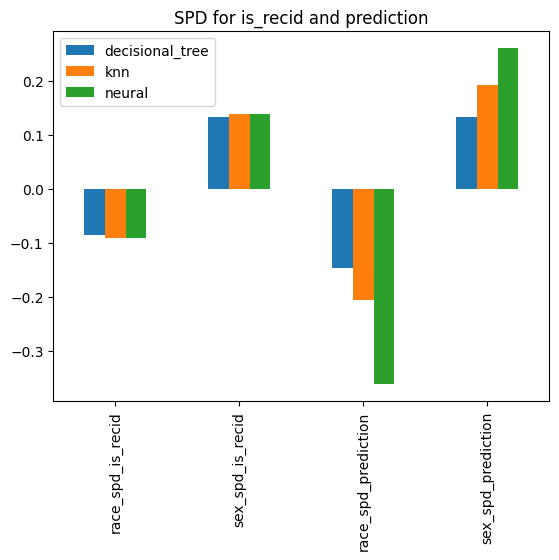

In [19]:
def plot_spd():
    methods = ["decisional_tree","knn","neural"]
    infos = {}
    for method in methods:
        infos[method] = spd(method)
    df = pd.DataFrame(infos)
    df.plot(kind='bar')
    plt.title("SPD for is_recid and prediction")
    plt.show()
   
plot_spd() 

# di (Disparate impact)

analyse

In [20]:
def di(model):
    df = pd.read_csv(f"data/prediction_with_{model}.csv")
    
    # for is_recid
    
    
    #for race
    df['protected_attr_race'] = df['race'].apply(lambda x: 0 if x == 'Caucasian' else 1)
    #rate of is_recid  for protected group
    protected_race_rate_is_recid = (df[df["protected_attr_race"] == 1]["is_recid"] == 0).mean()
    #rate of is_recid  for unprotected group
    unprotected_race_rate_is_recid  = (df[df["protected_attr_race"] == 0]["is_recid"] == 0).mean()
    #di
    race_di_is_recid  = protected_race_rate_is_recid / unprotected_race_rate_is_recid 
    if race_di_is_recid > 1:
        analyse_race_is_recid = "The model is biased against the protected group"
    elif race_di_is_recid == 1:
        analyse_race_is_recid = "The model is not biased"
    else:
        analyse_race_is_recid = "The model is biased against the unprotected group"
    print(f"Di for race : {race_di_is_recid } for is_recid \n {analyse_race_is_recid}")
    
    
    #for sex
    df['protected_attr_sex'] = df['sex'].apply(lambda x: 0 if x == 'Male' else 1)
    #rate of is_recid  for protected group
    protected_sex_rate_is_recid  = (df[df["protected_attr_sex"] == 1]["is_recid"] == 0).mean()
    #rate of is_recid  for unprotected group
    unprotected_sex_rate_is_recid  = (df[df["protected_attr_sex"] == 0]["is_recid"] == 0).mean()
    #di
    sex_di_is_recid  = protected_sex_rate_is_recid  / unprotected_sex_rate_is_recid 
    if sex_di_is_recid > 1:
        analyse_sex_is_recid = "The model is biased against the protected group"
    elif sex_di_is_recid == 1:
        analyse_sex_is_recid = "The model is not biased"
    else:
        analyse_sex_is_recid = "The model is biased against the unprotected group"
    print(f"di for sex : {sex_di_is_recid } for is_recid \n {analyse_sex_is_recid}")
    
    
    
    #for prediction
    
    
    #for race
    
    
    #rate of prediction  for protected group
    protected_race_rate_prediction = (df[df["protected_attr_race"] == 1]["prediction"]== 0).mean()
    #rate of prediction  for unprotected group
    unprotected_race_rate_prediction  = (df[df["protected_attr_race"] ==0]["prediction"]==0).mean()
    #di
    race_di_prediction = protected_race_rate_prediction  / unprotected_race_rate_prediction
    if race_di_prediction> 1:
        analyse_race_prediction= "The model is biased against the protected group"
    elif race_di_prediction == 1:
        analyse_race_prediction = "The model is not biased"
    else:
        analyse_race_prediction = "The model is biased against the unprotected group"
    print(f"Di for race : {race_di_prediction } for prediction \n {analyse_race_prediction}")
    
    
    #for sex
    #rate of prediction  for protected group
    protected_sex_rate_prediction  = (df[df["protected_attr_sex"] == 1]["prediction"]==0).mean()
    #rate of prediction  for unprotected group
    unprotected_sex_rate_prediction  = (df[df["protected_attr_sex"] ==0]["prediction"]==0).mean()
    #di
    sex_di_prediction  = protected_sex_rate_prediction  / unprotected_sex_rate_prediction
    if sex_di_prediction > 1:
        analyse_sex_prediction = "The model is biased against the protected group"
    elif sex_di_prediction == 1:
        analyse_sex_prediction= "The model is not biased"
    else:
        analyse_sex_prediction = "The model is biased against the unprotected group"
    print(f"Di for sex : {sex_di_prediction} for prediction \n {analyse_sex_prediction}")
    
    
    answer = {'race_di_is_recid': race_di_is_recid,
              'sex_di_is_recid':sex_di_is_recid,
              'race_di_prediction':race_di_prediction,
              'sex_di_prediction':sex_di_prediction}
    return answer
    

    

plot_di

Di for race : 0.8617510587564466 for is_recid 
 The model is biased against the unprotected group
di for sex : 1.249667058428664 for is_recid 
 The model is biased against the protected group
Di for race : 0.8043508159362915 for prediction 
 The model is biased against the unprotected group
Di for sex : 1.2110759007971978 for prediction 
 The model is biased against the protected group
Di for race : 0.851291177132061 for is_recid 
 The model is biased against the unprotected group
di for sex : 1.264320605076368 for is_recid 
 The model is biased against the protected group
Di for race : 0.7342261611157426 for prediction 
 The model is biased against the unprotected group
Di for sex : 1.3213497477061182 for prediction 
 The model is biased against the protected group
Di for race : 0.851291177132061 for is_recid 
 The model is biased against the unprotected group
di for sex : 1.264320605076368 for is_recid 
 The model is biased against the protected group
Di for race : 0.5780650654210622

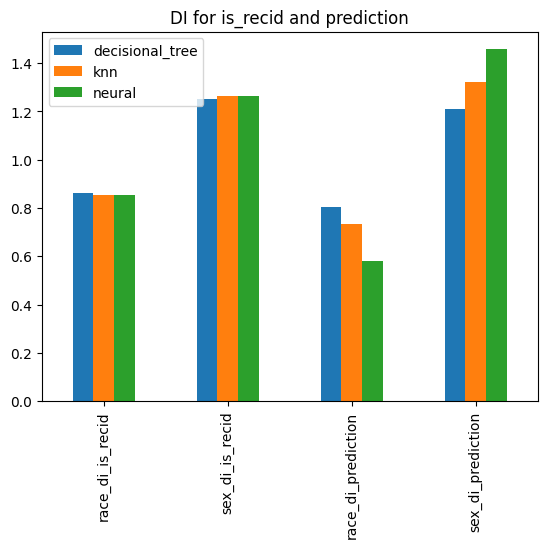

In [21]:
def plot_di():
    methods = ["decisional_tree","knn","neural"]
    infos = {}
    for method in methods:
        infos[method] = di(method)
    df = pd.DataFrame(infos)
    df.plot(kind='bar')
    plt.title("DI for is_recid and prediction")
    plt.show()
    
plot_di()

# EOD (Equal Opportunity Difference)

analyse

In [24]:
def eod(model):
    df = pd.read_csv(f"data/prediction_with_{model}.csv")
    # we compare the predictions with the is_recid column
    
    df['protected_attr_sex'] = df['sex'].apply(lambda x: 0 if x == 'Male' else 1)
    df['protected_attr_race'] = df['race'].apply(lambda x: 0 if x == 'Caucasian' else 1)
    
    #true positive  for protected group (race)
    protected_race_tp= df[(df["protected_attr_race"]== 1 ) & (df["prediction"]== 0) & (df["is_recid"]== 0)].shape[0]
    #total positive for protected group (race)
    protected_race_p = df[(df["protected_attr_race"]== 1 ) & (df["is_recid"]== 0)].shape[0]
    #true positive rate for protected group (race)
    protected_race_tpr = protected_race_tp/protected_race_p
    
    #same for unprotected group (race)
    unprotected_race_tp= df[(df["protected_attr_race"]== 0 ) & (df["prediction"]== 0) & (df["is_recid"]== 0)].shape[0]
    unprotected_race_p = df[(df["protected_attr_race"]== 0 ) & (df["is_recid"]== 0)].shape[0]
    unprotected_race_tpr = unprotected_race_tp/unprotected_race_p
    
    print(protected_race_tpr,unprotected_race_tpr)
    eod_race = protected_race_tpr - unprotected_race_tpr
    
    
    # same for sex
    
    #true positive  for protected group (sex)
    protected_sex_tp= df[(df["protected_attr_sex"]== 1 ) & (df["prediction"]== 0) & (df["is_recid"]== 0)].shape[0]
    #total positive for protected group (sex)
    protected_sex_p = df[(df["protected_attr_sex"]== 1 ) & (df["is_recid"]== 0)].shape[0]
    #true positive rate for protected group (sex)
    protected_sex_tpr = protected_sex_tp/protected_sex_p
    
    #same for unprotected group (sex)
    unprotected_sex_tp= df[(df["protected_attr_sex"]== 0 ) & (df["prediction"]== 0) & (df["is_recid"]== 0)].shape[0]
    unprotected_sex_p = df[(df["protected_attr_sex"]== 0 ) & (df["is_recid"]== 0)].shape[0]
    unprotected_sex_tpr = unprotected_sex_tp/unprotected_sex_p
    
    eod_sex = protected_sex_tpr - unprotected_sex_tpr
    
    
    answer  = {"eod_race": eod_race, 
               "eod_sex": eod_sex}
    
    return answer
    
    
    
eod("decisional_tree")

0.7786553650549027 0.8601833660772757


{'eod_race': -0.08152800102237301, 'eod_sex': 0.06552113477117694}

plot eod

0.7786553650549027 0.8601833660772757
0.7633509987770077 0.8918187964841109
0.6398287810843865 0.918526031102096


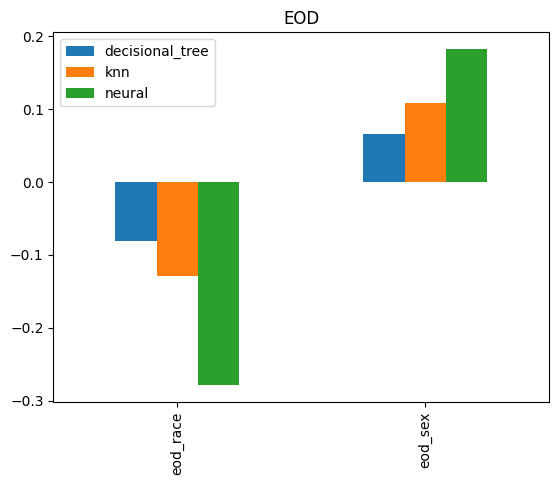

In [25]:
def plot_eod():
    methods = ["decisional_tree","knn","neural"]
    infos = {}
    for method in methods:
        infos[method] = eod(method)
    df = pd.DataFrame(infos)
    df.plot(kind='bar')
    plt.title("EOD")
    plt.show()
    
plot_eod()